In [2]:
from google_play_scraper import reviews
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt

In [3]:
APPS = {
    "FordPass": "com.ford.fordpass",
    # "Tesla": "com.teslamotors.tesla",
    # "GM": "com.gm.chevrolet.nomad.ownership",
    # "Hyundai": "com.hyundai.myhyundai"
}


In [7]:
def fetch_reviews(app_name, app_id, max_reviews=10000):
    # Local import ensures the function works even if earlier cells weren't run
    from google_play_scraper import reviews
    all_reviews = []
    continuation_token = None

    while len(all_reviews) < max_reviews:
        result, continuation_token = reviews(
            app_id,
            lang="en",
            country="us",
            count=200,
            continuation_token=continuation_token
        )
        if not result:
            break
        all_reviews.extend(result)

    df = pd.DataFrame(all_reviews)

    df = df.rename(columns={
        "content": "review_text",
        "at": "review_date",
        "score": "rating",
        "reviewCreatedVersion": "app_version",
        "thumbsUpCount": "thumbs_up"
    })

    df["app_name"] = app_name

    return df[
        ["app_name", "review_text", "review_date",
         "rating", "app_version", "thumbs_up"]
    ]


In [13]:
dfs = []

for app_name, app_id in APPS.items():
    print(f"Fetching reviews for {app_name}...")
    df_app = fetch_reviews(app_name, app_id, max_reviews=10000)
    dfs.append(df_app)

reviews_df = pd.concat(dfs, ignore_index=True)


Fetching reviews for FordPass...


In [14]:
reviews_df.info()
reviews_df["app_name"].value_counts()
reviews_df["review_text"].isna().sum()
reviews_df["review_date"].min(), reviews_df["review_date"].max()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   app_name     10000 non-null  object        
 1   review_text  10000 non-null  object        
 2   review_date  10000 non-null  datetime64[ns]
 3   rating       10000 non-null  int64         
 4   app_version  9667 non-null   object        
 5   thumbs_up    10000 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 468.9+ KB


(Timestamp('2024-11-06 05:58:06'), Timestamp('2026-02-04 11:36:46'))

In [15]:
reviews_df["review_text"].isna().sum()
reviews_df["app_name"].value_counts()
# Remove rows where app_name == 'Hyundai' (previous drop used axis=1 and removed a column)
reviews_df = reviews_df[reviews_df['app_name'] != 'Hyundai']

<Axes: title={'center': 'Number of Reviews per App'}, xlabel='App Name', ylabel='Number of Reviews'>

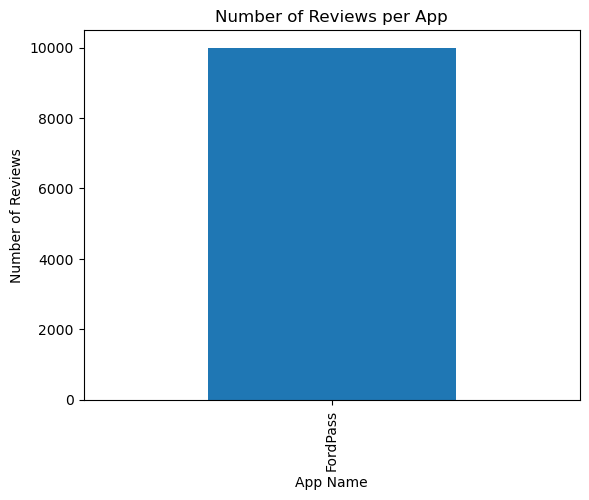

In [16]:
reviews_df['app_name'].value_counts().plot(kind='bar',xlabel='App Name', ylabel='Number of Reviews', title='Number of Reviews per App')

In [17]:
reviews_df.to_csv("Ford_Pass_car_apps_reviews.csv", index=False)